In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow. keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import matplotlib. pyplot as plt
import  tensorflow as tf
import numpy as np
import cv2
import os

In [16]:
img_path = r"C:\Users\HI\Desktop\ml model\basedata\train\happy\199385759_345470910277839_3988273979229903886_n.jpg"
img = image.load_img(img_path)

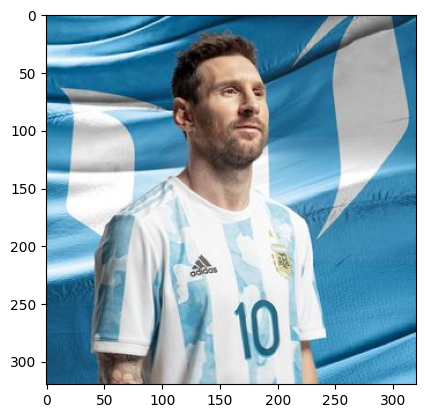

In [17]:
plt.imshow(img)

In [18]:
cv2.imread( r"C:\Users\HI\Desktop\ml model\basedata\train\happy\199385759_345470910277839_3988273979229903886_n.jpg").shape


(320, 320, 3)

In [19]:
train= ImageDataGenerator(rescale= 1/255)
validation=ImageDataGenerator(rescale= 1/255)

In [20]:
train_dataset = train.flow_from_directory(
    r"C:\Users\HI\Desktop\ml model\basedata\train",
    target_size=(200, 200),
    batch_size=3,  # Change to an integer
    class_mode='binary'
)

validation_dataset = train.flow_from_directory(
    r"C:\Users\HI\Desktop\ml model\basedata\validation",
    target_size=(200, 200),
    batch_size=3,  # Change to an integer
    class_mode='binary'
)


Found 91 images belonging to 2 classes.
Found 32 images belonging to 2 classes.


In [21]:
#train_dataset.class_indices

In [22]:
#train_dataset.classes

In [23]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(512, activation='relu'),
    
    tf.keras.layers.Dense(1, activation='sigmoid')
])


In [24]:
model. compile(
    loss='binary_crossentropy',
    optimizer=RMSprop(learning_rate=0.001),
    metrics=['accuracy']
)


In [25]:
model_fit = model.fit(
    train_dataset,
    steps_per_epoch=len(train_dataset),  # Adjust steps_per_epoch
    epochs=40,
    validation_data=validation_dataset
)

Epoch 1/40
31/31 [==============================] - 15s 420ms/step - loss: 0.8229 - accuracy: 0.6484 - val_loss: 0.7039 - val_accuracy: 0.4062
Epoch 2/40
31/31 [==============================] - 11s 345ms/step - loss: 0.6139 - accuracy: 0.8132 - val_loss: 1.2365 - val_accuracy: 0.5000
Epoch 3/40
31/31 [==============================] - 11s 358ms/step - loss: 0.4821 - accuracy: 0.8132 - val_loss: 0.7066 - val_accuracy: 0.5625
Epoch 4/40
31/31 [==============================] - 11s 330ms/step - loss: 0.2493 - accuracy: 0.9231 - val_loss: 1.5937 - val_accuracy: 0.5312
Epoch 5/40
31/31 [==============================] - 11s 349ms/step - loss: 0.1663 - accuracy: 0.9231 - val_loss: 1.3988 - val_accuracy: 0.4688
Epoch 6/40
31/31 [==============================] - 12s 391ms/step - loss: 0.1192 - accuracy: 0.9451 - val_loss: 1.1337 - val_accuracy: 0.5625
Epoch 7/40
31/31 [==============================] - 11s 340ms/step - loss: 0.0245 - accuracy: 0.9890 - val_loss: 2.7018 - val_accuracy: 0.4688

In [26]:
validation_dataset.class_indices

{'happy': 0, 'not_happy': 1}

{'happy': 0, 'not_happy': 1}


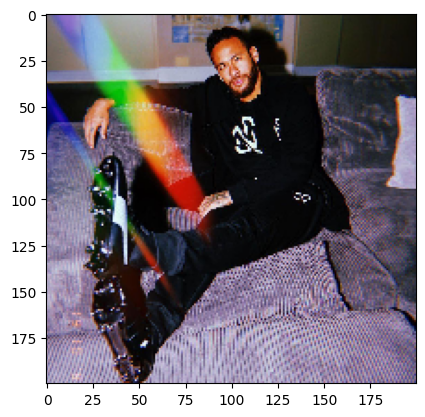

1/1 [==============================] - 0s 31ms/step
You are not happy


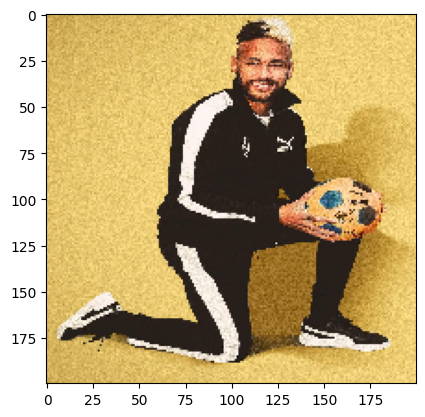

1/1 [==============================] - 0s 37ms/step
You are not happy


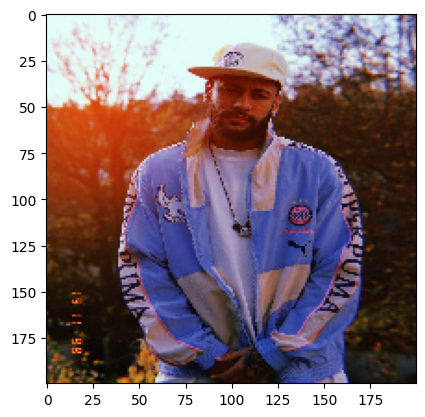

1/1 [==============================] - 0s 57ms/step
You are not happy


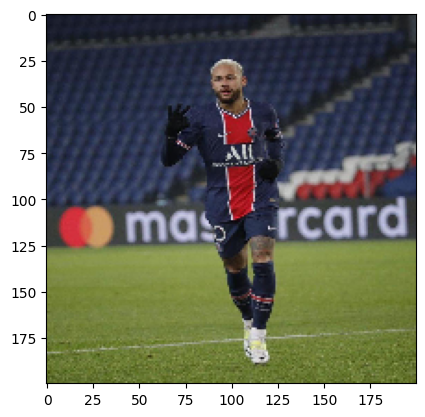

1/1 [==============================] - 0s 48ms/step
You are not happy


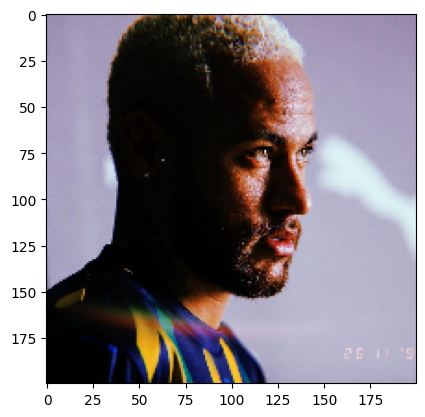

1/1 [==============================] - 0s 36ms/step
You are not happy


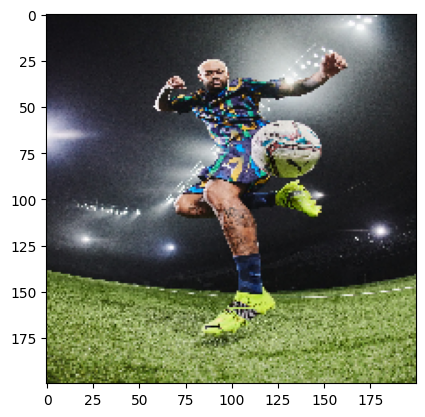

1/1 [==============================] - 0s 26ms/step
You are not happy


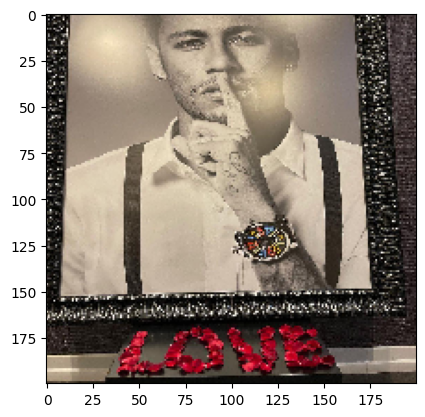

1/1 [==============================] - 0s 29ms/step
You are not happy


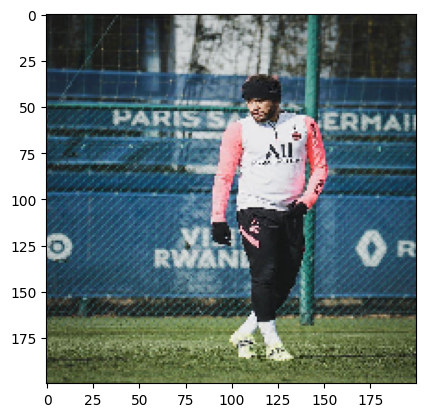

1/1 [==============================] - 0s 30ms/step
You are not happy


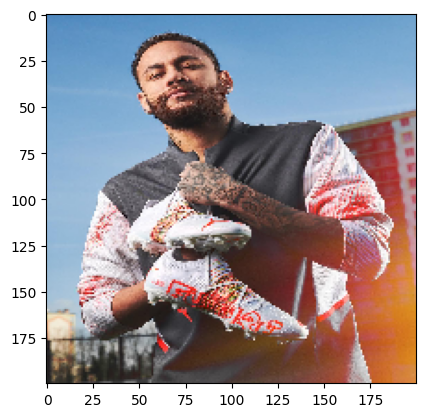

1/1 [==============================] - 0s 58ms/step
You are not happy


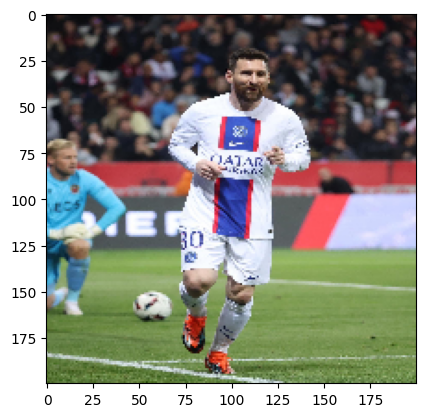

1/1 [==============================] - 0s 64ms/step
You are happy


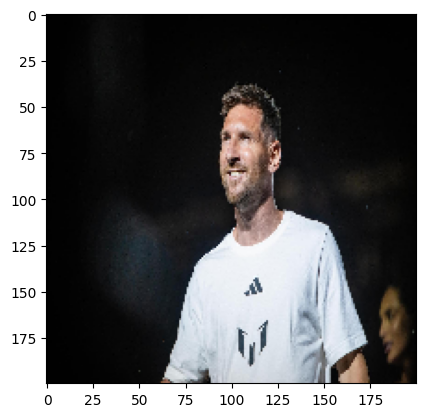

1/1 [==============================] - 0s 48ms/step
You are happy


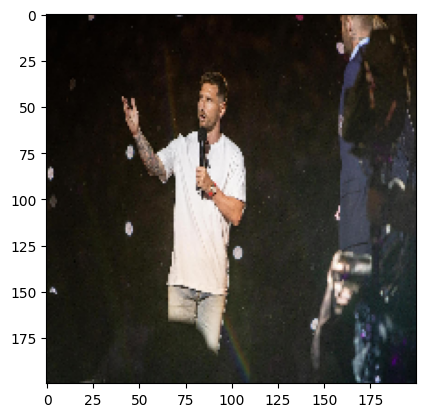

1/1 [==============================] - 0s 33ms/step
You are happy


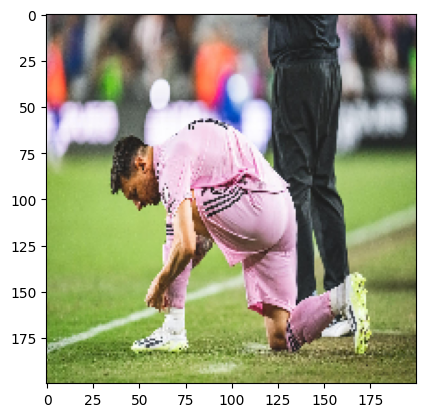

1/1 [==============================] - 0s 34ms/step
You are happy


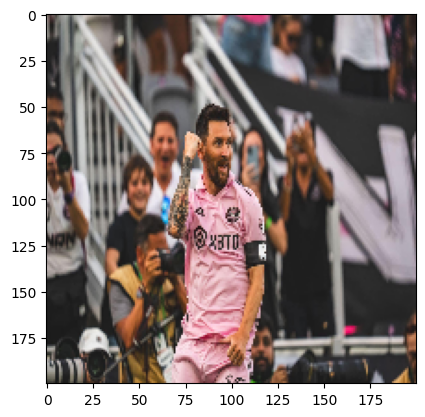

1/1 [==============================] - 0s 78ms/step
You are not happy


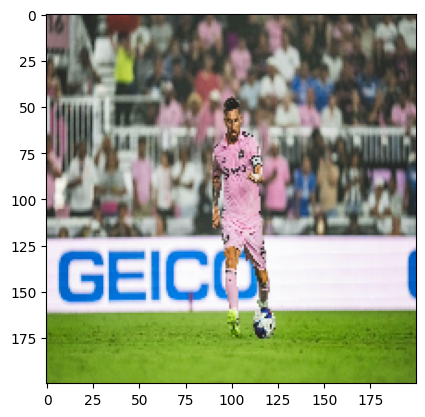

1/1 [==============================] - 0s 62ms/step
You are happy


In [28]:


# Print class indices
print(train_dataset.class_indices)

dir_path = r'C:\Users\HI\Desktop\ml model\basedata\testing'

for i in os.listdir(dir_path):
    img = image.load_img(dir_path + '//' + i, target_size=(200, 200))
    plt.imshow(img)
    plt.show()

    X = image.img_to_array(img)
    X = np.expand_dims(X, axis=0)
    images = np.vstack([X])
    
    # Use a threshold (e.g., 0.5) to decide between the two classes
    val = model.predict(images)
    if val[0][0] < 0.5:
        print("You are happy")
    else:
        print("You are not happy")